[View in Colaboratory](https://colab.research.google.com/github/VedSengupta/MACHINE-LEARNING-PYTHON-R/blob/VED/Begin_with_Tensorflow.ipynb)

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#!pip install matplotlib

In [110]:
#a tensor is a muti-dimensional array
#tf.constant allows tensor to have a constant value
t1=tf.constant(2.0,dtype=tf.float32,name='ved')
print(t1)

Tensor("ved_5:0", shape=(), dtype=float32)


In [111]:
#1D tensor
t2=tf.constant([0,1,2],dtype=tf.float32,name='1D')
print(t2)

Tensor("1D_4:0", shape=(3,), dtype=float32)


In [112]:
#a Session in tensorflow
sess=tf.Session()
print(sess.run(t1))

2.0


In [113]:
sess.run(t2)
print(sess.run(t2))

[0. 1. 2.]


In [114]:
t3=tf.constant([[1,2,3],[4,5,6]],dtype=tf.float32,name='2D')
print(sess.run(t3))
print(t3)

[[1. 2. 3.]
 [4. 5. 6.]]
Tensor("2D_6:0", shape=(2, 3), dtype=float32)


In [0]:
#call close() to close a session
sess.close()

In [116]:
#iterative call of sessions
with tf.Session() as sess:
  print(sess.run(t1))
  print(sess.run(t2))
  print(sess.run(t3))
sess.close()

2.0
[0. 1. 2.]
[[1. 2. 3.]
 [4. 5. 6.]]


In [117]:
#computational graph
node_1=tf.constant(1.0,dtype=tf.float32,name='leaf_node1')
node_2=tf.constant(2.0,dtype=tf.float32,name='leaf_node2')
node_3=tf.constant(3.0,dtype=tf.float32,name='leaf_node3')

cg_1=(node_1+node_2)*node_3
print(cg_1)

#alternatively

cg_1_1=tf.multiply(tf.add(node_1,node_2),node_3)
print(cg_1_1)

Tensor("mul_28:0", shape=(), dtype=float32)
Tensor("Mul_29:0", shape=(), dtype=float32)


In [118]:
with tf.Session() as sess:
  print(sess.run(cg_1))
  print(sess.run(cg_1_1))

9.0
9.0


In [119]:
lnode_1=tf.constant(7,dtype=tf.float32,name='leaf_node1')
lnode_2=tf.constant(8,dtype=tf.float32,name='leaf_node2')
lnode_3=tf.constant(9,dtype=tf.float32,name='leaf_node3')
lnode_4=tf.constant(10,dtype=tf.float32,name='leaf_node4')
lnode_5=tf.constant(7,dtype=tf.float32,name='leaf_node5')
lnode_6=tf.constant(10,dtype=tf.float32,name='leaf_node6')
lnode_7=tf.constant(19.5,dtype=tf.float32,name='leaf_node7')

cg_1=tf.add(lnode_1,lnode_2)
cg_2=tf.add(lnode_3,lnode_4)
cg_sub=tf.subtract(cg_1,cg_2)
cg_3=tf.multiply(lnode_5,lnode_6)
cg_4=tf.divide(cg_3,lnode_7)
cg_6=tf.maximum(cg_sub,cg_4)
print(cg_6)

#alternatively
result=tf.maximum((lnode_1+lnode_2)-(lnode_3+lnode_4),((lnode_5*lnode_6))/lnode_7)
with tf.Session() as sess:
  print(sess.run(result))


Tensor("Maximum_12:0", shape=(), dtype=float32)
3.5897436


In [120]:
node_1=tf.constant([9,10,11],dtype=tf.float32,name='node1')
node_2=tf.constant([7,8,6.5],dtype=tf.float32,name='node2')
node_3=tf.constant(5.6,dtype=tf.float32,name='node3')
node_4=tf.constant([7.65,9.0,6.75],dtype=tf.float32,name='node4')
node_5=tf.constant([13.5,7.18,17],dtype=tf.float32,name='node5')

cg=tf.minimum(((node_1*node_2)/node_3),(node_4+node_5))
with tf.Session() as sess:
  print(sess.run(cg))

[11.25     14.285714 12.767858]


Linear Regression using low level Tensorflow API's


In [0]:
#creating a dataset
X= np.linspace(-30,300.0,300)
y= 2* np.linspace(-30.0,250.0,300)+np.random.rand(*X.shape)

In [0]:
train_X=X[:250]
train_y=y[:250]

test_X=X[250 :]
test_y=y[250 :]

In [0]:
learning_rate=0.000005
n_epochs=1000
interval=10

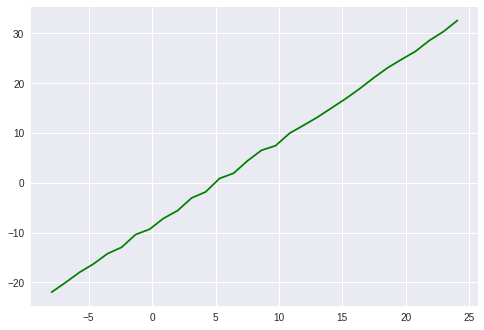

In [124]:
plt.plot(train_X[20:50],train_y[20:50],'g')
plt.show()


In [0]:
#placeholders
x=tf.placeholder(tf.float32,name='x')
y=tf.placeholder(tf.float32,name='y')


In [0]:
#LR model
w=tf.Variable(0.0,name='weight1')
b=tf.Variable(0.0,name='bias_1')
pred_y=(w*x)+b

In [0]:
#loss function
loss=tf.reduce_mean(tf.square(y-pred_y))

In [0]:
#optimizer
optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
                  .minimize(loss)

In [155]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for epoch in range(n_epochs):
    curr_loss=sess.run([optimizer,loss],feed_dict={x:train_X,y:train_y})
    
    if epoch%interval==0:
      print('Loss after epoch',epoch,'is',curr_loss)
  final_preds,final_loss=sess.run([pred_y,loss],feed_dict={x:test_X,y:test_y})
  print('final loss is',final_loss)

Loss after epoch 0 is [None, 48429.184]
Loss after epoch 10 is [None, 967.79803]
Loss after epoch 20 is [None, 44.846695]
Loss after epoch 30 is [None, 26.896826]
Loss after epoch 40 is [None, 26.545923]
Loss after epoch 50 is [None, 26.537262]
Loss after epoch 60 is [None, 26.535248]
Loss after epoch 70 is [None, 26.533371]
Loss after epoch 80 is [None, 26.531492]
Loss after epoch 90 is [None, 26.529621]
Loss after epoch 100 is [None, 26.52778]
Loss after epoch 110 is [None, 26.525911]
Loss after epoch 120 is [None, 26.524036]
Loss after epoch 130 is [None, 26.52216]
Loss after epoch 140 is [None, 26.520283]
Loss after epoch 150 is [None, 26.518408]
Loss after epoch 160 is [None, 26.516531]
Loss after epoch 170 is [None, 26.514635]
Loss after epoch 180 is [None, 26.512768]
Loss after epoch 190 is [None, 26.510891]
Loss after epoch 200 is [None, 26.509018]
Loss after epoch 210 is [None, 26.507137]
Loss after epoch 220 is [None, 26.505262]
Loss after epoch 230 is [None, 26.503395]
Loss 

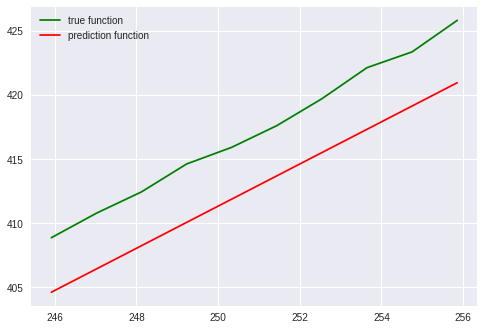

In [156]:
plt.plot(test_X[:10],test_y[:10],'g',label='true function')
plt.plot(test_X[:10],final_preds[:10],'r',label='prediction function')
plt.legend()
plt.show()